<a href="https://colab.research.google.com/github/HrishiHarsora/ES113---Data-Centric-Computing-/blob/main/23110138_ES113_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Data Visualization using Matplotlib



In [ ]:
# Import Matplotlib and allow plots to show in the Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline
# Import NumPy and Pandas
import numpy as np
import pandas as pd
import statistics as st

# **Question 1**

In [ ]:
#Loading Datasets
df1 = pd.read_csv('Study_results.csv')
df2 = pd.read_csv('Mouse_metadata.csv')

#Merging
dfm = pd.merge(df1,df2,on='Mouse ID',how='outer')

#Cleaning and Displaying
dfmc = dfm.drop_duplicates(subset=['Mouse ID' , 'Timepoint'])
dfmc = dfmc.reset_index()
dfmc

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
1883,1888,m601,25,33.118756,1,Capomulin,Male,22,17
1884,1889,m601,30,31.758275,1,Capomulin,Male,22,17
1885,1890,m601,35,30.834357,1,Capomulin,Male,22,17
1886,1891,m601,40,31.378045,1,Capomulin,Male,22,17


# **Question 2**

In [ ]:
#The Shape of the Merged, Cleaned up Dataset
print("The Shape of the Merged Dataset before dropping = " + str(dfm.shape))
print("The Shape of the Merged dataset after dropping off duplicate timepoint values = " + str(dfmc.shape))
#5 Rows have been dropped which had the same timepoints

The Shape of the Merged Dataset before dropping = (1893, 8)
The Shape of the Merged dataset after dropping off duplicate timepoint values = (1888, 9)


In [ ]:
#Printing First 5 rows of the Merged,Cleaned up dataset
dfmc.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22


In [ ]:
#Printing the last 5 rows of the Merged,Cleaned up dataset
dfmc.tail()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,1888,m601,25,33.118756,1,Capomulin,Male,22,17
1884,1889,m601,30,31.758275,1,Capomulin,Male,22,17
1885,1890,m601,35,30.834357,1,Capomulin,Male,22,17
1886,1891,m601,40,31.378045,1,Capomulin,Male,22,17
1887,1892,m601,45,28.430964,1,Capomulin,Male,22,17


# **Question 3**

In [ ]:
#Printing the different types of Drug Regimens
print(set(dfmc['Drug Regimen']))

{'Ramicane', 'Propriva', 'Capomulin', 'Naftisol', 'Stelasyn', 'Ceftamin', 'Placebo', 'Ketapril', 'Zoniferol', 'Infubinol'}


In [ ]:
summary_stats_table = dfmc.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

# Select relevant columns and rename them
summary_stats_table = summary_stats_table[['mean', '50%', 'std']].rename(columns={
    'mean': 'Mean',
    '50%': 'Median',
    'std': 'Standard Deviation'
})

# Here I am Adding The variance column
summary_stats_table['Variance'] = dfmc.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

summary_stats_table

,Mean,Median,Standard Deviation,Variance
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764
Ceftamin,52.591172,51.776157,6.268188,39.290177
Infubinol,52.884795,51.820584,6.567243,43.128684
Ketapril,55.235638,53.698743,8.279709,68.553577
Naftisol,54.331565,52.509285,8.134708,66.173479
Placebo,54.033581,52.288934,7.821003,61.168083
Propriva,52.393463,50.909965,6.568014,43.138803
Ramicane,40.216745,40.673236,4.846308,23.486704
Stelasyn,54.233149,52.431737,7.710419,59.450562


# **Question 4**

<Figure size 640x480 with 0 Axes>

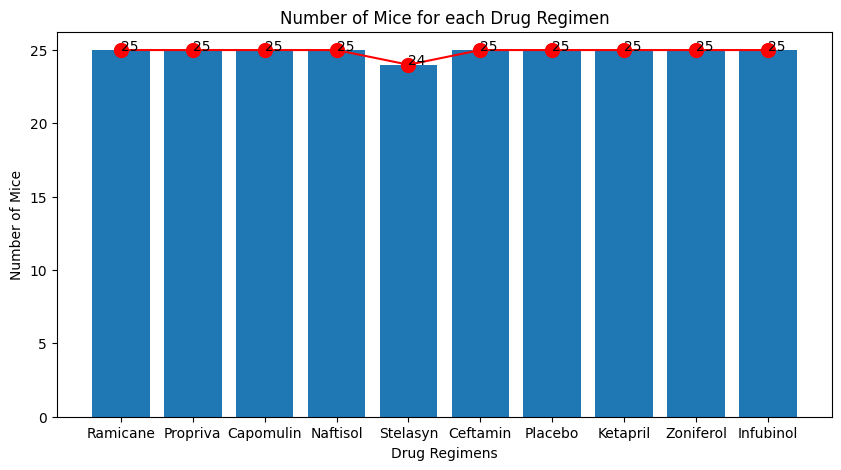

In [ ]:
#Defining the x and y axes
Drug_Regimens = list(set(dfmc['Drug Regimen']))
Count = []

#Getting Number of Mice in case of each Drug
for j in list(set(dfmc['Drug Regimen'])):
  A = np.array(dfmc['Mouse ID'].where(dfmc['Drug Regimen']==j))
  A = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), A))
  A = list(set(A))
  Count.append(len(A))

#Reassigning
x = Drug_Regimens
y = Count

#Plotting
fig = plt.figure()
fig.figsize = (10,5)
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(x,y)
ax.scatter(x,y,c='r',s=100)
ax.plot(x,y,c='r')
ax.title.set_text('Number of Mice for each Drug Regimen')
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Number of Mice')
for i, txt in enumerate(y):
    ax.annotate(txt, (x[i], y[i]))

# **Question 5**

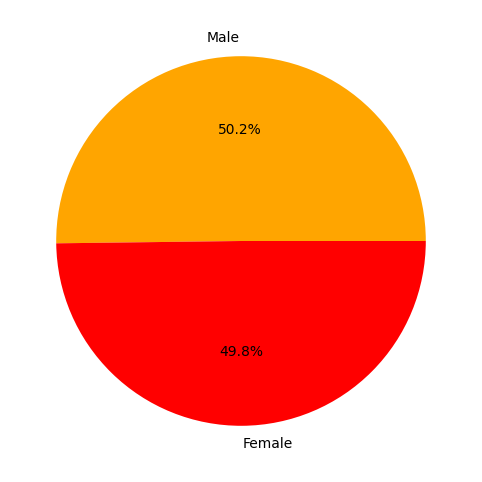

In [ ]:
males=dfmc[dfmc["Sex"]=="Male"].drop_duplicates(subset=["Mouse ID"])
females=dfmc[dfmc["Sex"]=="Female"].drop_duplicates(subset=["Mouse ID"])


plt.figure(figsize=(12,6))
labels = ['Male','Female']
total = [len(males),len(females)]
colors = ['orange','red']
plt.pie(total, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()

# **Question 6**

In [ ]:
#Each drug was used on many mice


#Reductions dictionary will store the average reduction in tumour volume in case of each Drug Regimen
Reductions = {}
for j in set(dfmc['Drug Regimen']):

  A = np.array(dfmc['Mouse ID'].where(dfmc['Drug Regimen']==j))
  A = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), A))
  A = set(A)

  D ={}

  for i in A:
    B = np.array(dfmc['Tumor Volume (mm3)'].where(dfmc['Mouse ID']==i))
    B = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), B))
    D[i] = (B[-1]-B[0])/B[0]

  D = list(D.values())
  Reductions[j] = np.mean(D)


D = pd.DataFrame({"Drug Regimens" : list(Reductions.keys()) , "Reductions" : list(Reductions.values())})
D = D.sort_values(by = "Reductions")
print(D[-4:])

  Drug Regimens  Reductions
6       Placebo    0.344631
4      Stelasyn    0.355593
3      Naftisol    0.360128
7      Ketapril    0.395693


# **Question 7**

In [ ]:
# Step 1: Filter the data for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = dfmc[dfmc['Drug Regimen'].isin(treatment_regimens)]

# Step 2: Calculate the final tumor volume for each mouse
final_tumor_volumes = filtered_data.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].last().reset_index()

# Step 3: Calculate quartiles and IQR for each treatment regimen
grouped = final_tumor_volumes.groupby('Drug Regimen')
quartiles = grouped['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])

# Step 4: Determine potential outliers
def find_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    return outliers

potential_outliers = grouped['Tumor Volume (mm3)'].apply(find_outliers).reset_index()

# Step 5: Output summary statistics
print("Summary Statistics for Final Tumor Volume (mm3) by Drug Regimen:")
for regimen in treatment_regimens:
    outliers_count = potential_outliers[potential_outliers['Drug Regimen'] == regimen].shape[0]
    print(f"Drug Regimen: {regimen}")
    print(f"First Quartile: {quartiles.loc[(regimen, 0.25)]}")
    print(f"Second Quartile (Median): {quartiles.loc[(regimen, 0.5)]}")
    print(f"Third Quartile: {quartiles.loc[(regimen, 0.75)]}")
    print(f"IQR: {quartiles.loc[(regimen, 0.75)] - quartiles.loc[(regimen, 0.25)]}")
    print(f"Lower Bound: {quartiles.loc[(regimen, 0.25)] - 1.5 * (quartiles.loc[(regimen, 0.75)] - quartiles.loc[(regimen, 0.25)])}")
    print(f"Upper Bound: {quartiles.loc[(regimen, 0.75)] + 1.5 * (quartiles.loc[(regimen, 0.75)] - quartiles.loc[(regimen, 0.25)])}")
    print(f"Number of Potential Outliers: {outliers_count}")
    print("\n")


Summary Statistics for Final Tumor Volume (mm3) by Drug Regimen:
Drug Regimen: Capomulin
First Quartile: 32.37735684
Second Quartile (Median): 38.1251644
Third Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Number of Potential Outliers: 0


Drug Regimen: Ramicane
First Quartile: 31.56046955
Second Quartile (Median): 36.56165229
Third Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Number of Potential Outliers: 0


Drug Regimen: Infubinol
First Quartile: 54.04860769
Second Quartile (Median): 60.16518046
Third Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Number of Potential Outliers: 1


Drug Regimen: Ceftamin
First Quartile: 48.72207785
Second Quartile (Median): 59.85195552
Third Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Number of Potential Outliers: 0



# **Question 8**

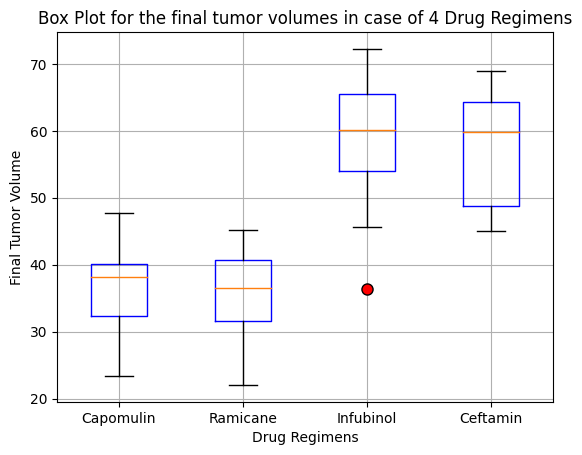

In [ ]:
W = {}
Drugs = ['Capomulin' , 'Ramicane' , 'Infubinol' , 'Ceftamin']
for k in Drugs :
  A = np.array(dfmc['Mouse ID'].where(dfmc['Drug Regimen']== k))
  A = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), A))
  A = set(A)

  #Finding the final tumour volumes in case of each mice after drug application and recording this information in a dictionary
  D ={}

  for i in A:
    B = np.array(dfmc['Tumor Volume (mm3)'].where(dfmc['Mouse ID']==i))
    B = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), B))
    D[i] = B[-1]
  L = list(D.values())
  W[k]=L

fig,ax = plt.subplots()
boxprops = dict(color="blue")
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
ax.boxplot(list(W.values()),boxprops=boxprops, flierprops=flierprops)
ax.set_xticklabels(Drugs)
ax.set_title("Box Plot for the final tumor volumes in case of 4 Drug Regimens")
ax.set_xlabel("Drug Regimens")
ax.set_ylabel("Final Tumor Volume")
plt.grid(True)

# **Question 9**

{'j119', 'j246', 'w914', 'g316', 'x401', 'b742', 'm957', 'r157', 'b128', 's185', 'i738', 'r554', 'l897', 'w150', 'y793', 's710', 'm601', 'v923', 'f966', 'g288', 'l509', 'i557', 't565', 'r944', 'u364'}


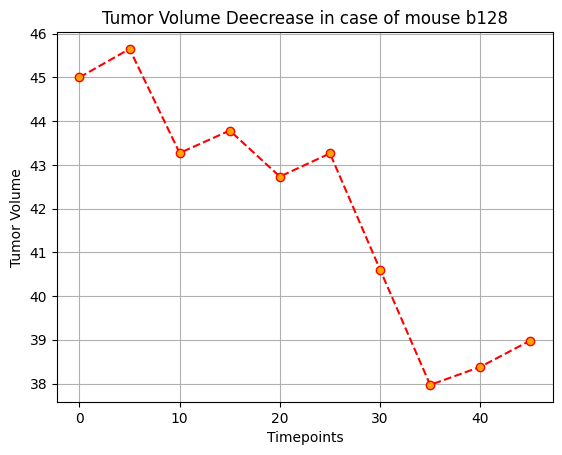

In [ ]:
#Choosing a mouse
A = np.array(dfmc['Mouse ID'].where(dfmc['Drug Regimen']=='Capomulin'))
A = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), A))
print(set(A))
i = "b128"

#For y values
y = np.array(dfmc['Tumor Volume (mm3)'].where(dfmc['Mouse ID']==i))
y = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), y))

#For x values
x = np.arange(0,50,5)

plt.plot(x,y,marker='o',linestyle='dashed',color='red',markerfacecolor='orange')
plt.title("Tumor Volume Deecrease in case of mouse " + str(i))
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")
plt.grid(True)


# **Question 10**

Text(0, 0.5, 'Average Tumor Volume during course of treatment')

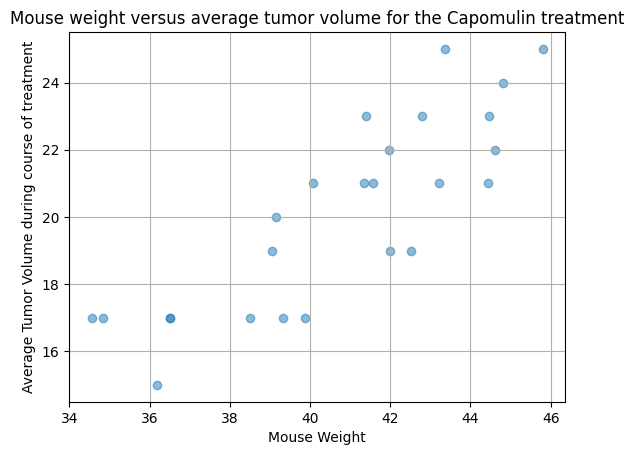

In [ ]:
#Getting IDs of mice on whom Capomulin was used
A = np.array(dfmc['Mouse ID'].where(dfmc['Drug Regimen']=='Capomulin'))
A = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), A))
A = set(A)

weights = {}
Average_Tumor_Volume = {}

for i in A:
  filtered = np.array(dfmc['Weight (g)'].where(dfmc['Mouse ID']==i))
  filtered = list(set(list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), filtered))))
  weights[i] = filtered[0]
  B = np.array(dfmc['Tumor Volume (mm3)'].where(dfmc['Mouse ID']==i))
  B = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), B))
  Average_Tumor_Volume[i] = np.mean(B)

colors = np.random.rand(50)
area = (30 * np.random.rand(50))**2
plt.scatter(Average_Tumor_Volume.values(),weights.values(),alpha=0.5)
plt.grid(True)
plt.title("Mouse weight versus average tumor volume for the Capomulin treatment")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume during course of treatment")